# 🧹Data Cleaning and Preprocessing


This notebook handles data cleaning and preprocessing steps necessary for building reliable models. Key operations include handling missing values, encoding categorical variables, and preparing the dataset for training and evaluation.


In [2]:
# Importing libraries

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder


## Data Cleaning

In [3]:
hotel_dataset = pd.read_csv('../data/hotel_bookings.csv')

In [4]:
hotel_dataset.shape

(36275, 19)

In [5]:
hotel_dataset.isna().sum().reset_index(name='missing')

,index,missing
0,Booking_ID,0
1,no_of_adults,413
2,no_of_children,324
3,no_of_weekend_nights,367
4,no_of_week_nights,807
5,type_of_meal_plan,526
6,required_car_parking_space,2592
7,room_type_reserved,1171
8,lead_time,472
9,arrival_year,378


The data contains significant number of missing field across all variables. 

In [6]:
hotel_dataset = hotel_dataset.dropna()

In [7]:
hotel_dataset.shape

(27511, 19)

Rows containing missing values were removed from the dataset instead of applying imputation techniques.

Given the ample size of the dataset, this approach preserves data integrity and avoids introducing potential biases from estimated values. Approximately 8,000 rows were removed during this process, leaving a final dataset of around 27,000 complete observations.

This ensures that all subsequent analyses and modeling are performed on complete and reliable data, maintaining the quality and robustness of the project.

### Changing Variables Types

In [8]:
# Drop Booking_ID
hotel_dataset = hotel_dataset.drop(columns=['Booking_ID'])

# Convert columns to category dtype
categorical_columns = [
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'arrival_year',
    'arrival_month',
    'arrival_date',
    'market_segment_type',
    'repeated_guest',
    'booking_status'
]

# Apply categorical type
hotel_dataset[categorical_columns] = hotel_dataset[categorical_columns].astype('category')


In [9]:
hotel_dataset.dtypes

no_of_adults                             float64
no_of_children                           float64
no_of_weekend_nights                     float64
no_of_week_nights                        float64
type_of_meal_plan                       category
required_car_parking_space              category
room_type_reserved                      category
lead_time                                float64
arrival_year                            category
arrival_month                           category
arrival_date                            category
market_segment_type                     category
repeated_guest                          category
no_of_previous_cancellations             float64
no_of_previous_bookings_not_canceled     float64
avg_price_per_room                       float64
no_of_special_requests                   float64
booking_status                          category
dtype: object

The booking_id variable was removed from the dataset, as it does not contribute to the analysis. Addition-
ally, categorical variables were converted into factors to ensure they are properly recognized and processed
in subsequent analyses.

### Outliers Analysis

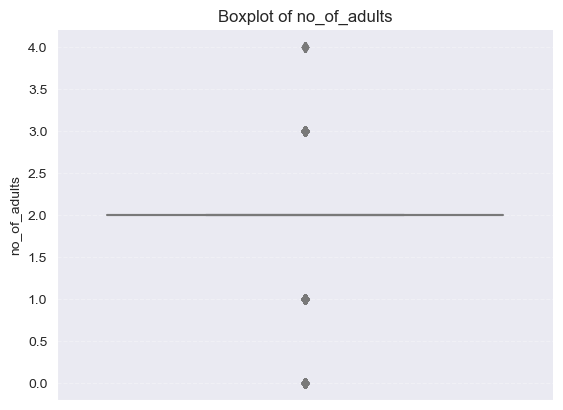

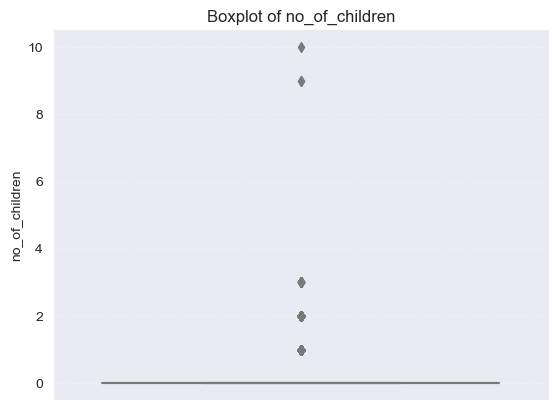

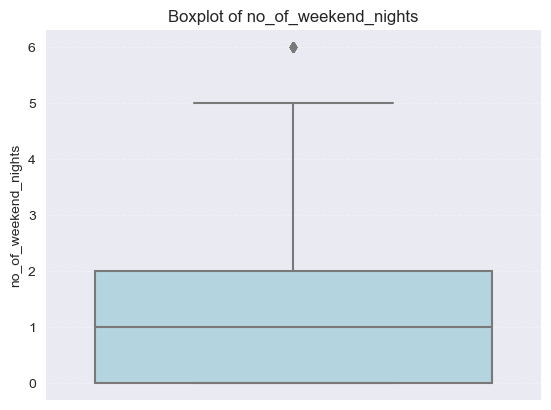

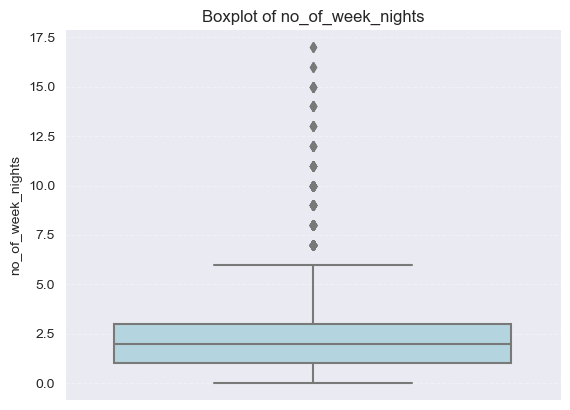

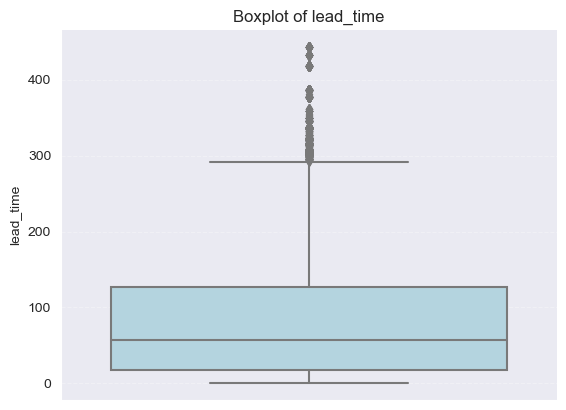

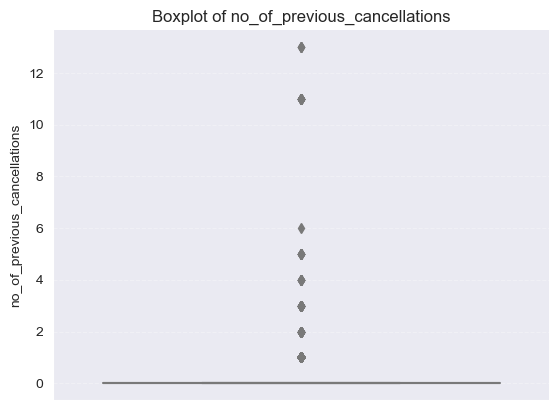

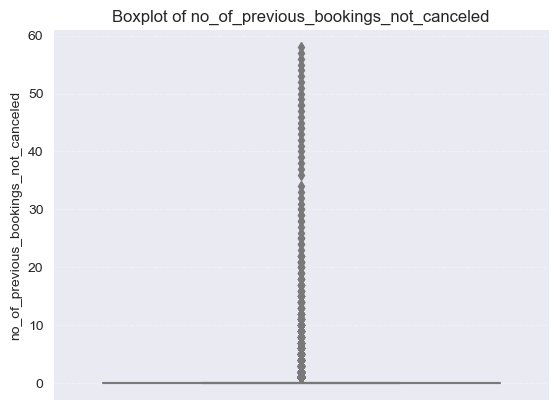

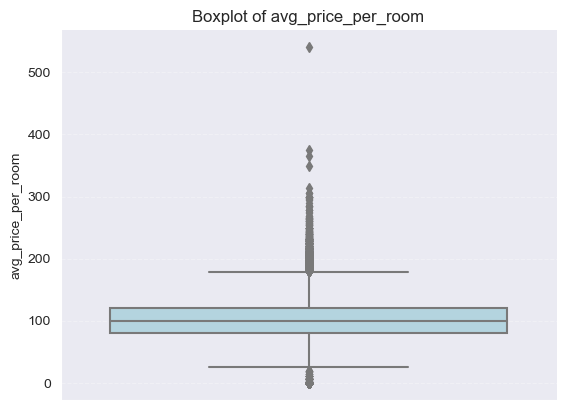

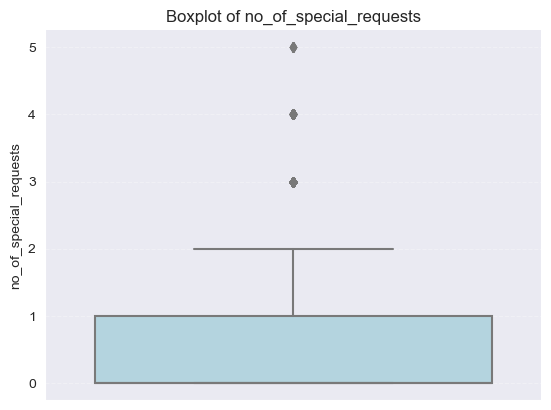

In [10]:
# Select numeric columns
numeric_cols = hotel_dataset.select_dtypes(include='number').columns

# Create boxplots for each numeric variable
for col in numeric_cols:
    fig, ax = plt.subplots()

    sns.boxplot(y=hotel_dataset[col], ax=ax, color='lightblue')

    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel(col)

    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

 
    #plt.savefig(f"../plots/outliers/boxplot_{col}.png", dpi=300, bbox_inches='tight')

    plt.show()


Each variable contains a significant number of outliers due to their inherently right-skewed distributions. Re-
moving these outliers would lead to a substantial loss of data diversity and could potentially discard valuable
information. Therefore, outliers will not be removed. Instead, these variables will be processed in subse-
quent steps using normalization and square root scaling to handle skewness and improve data distribution
for analysis.

## Data Preprocessing

Due to the highly skewed nature of the variables, the presence of sparse data and numerous zeros, and the
varying scales of the values, a square root transformation will be applied to smooth the distribution. To
further standardize the scale of the variables, Z-score scaling will be used after the transformation. This
approach will help ensure a more uniform distribution and comparable scales across all variables for more
effective analysis.

### Data Distribution Before Preprocessing

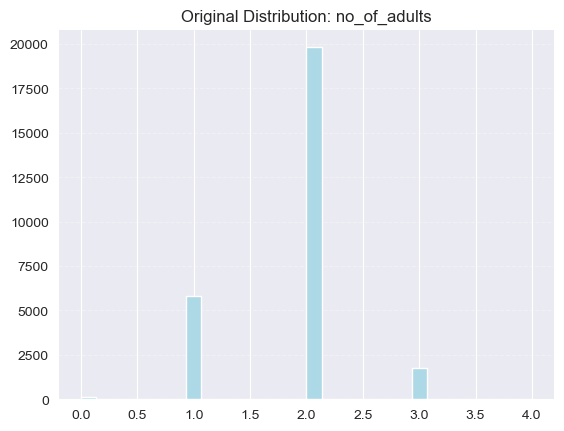

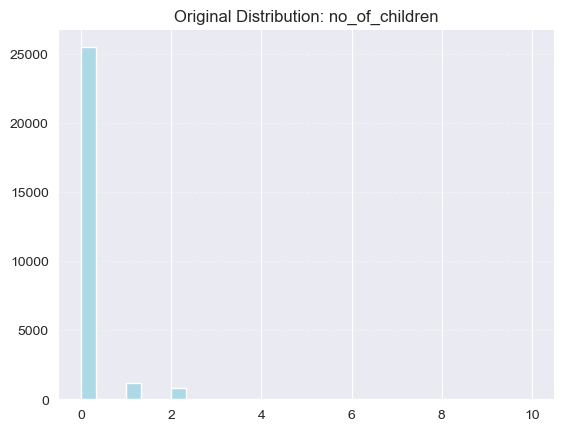

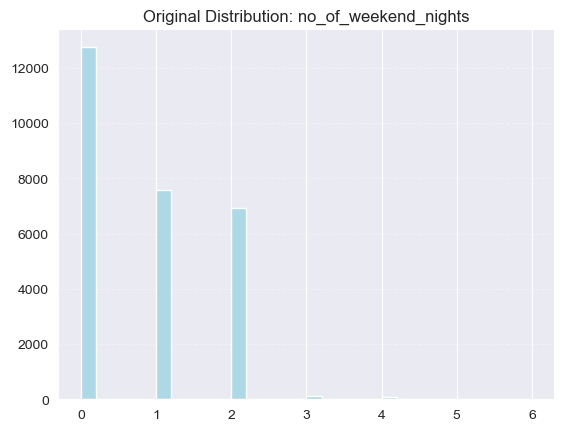

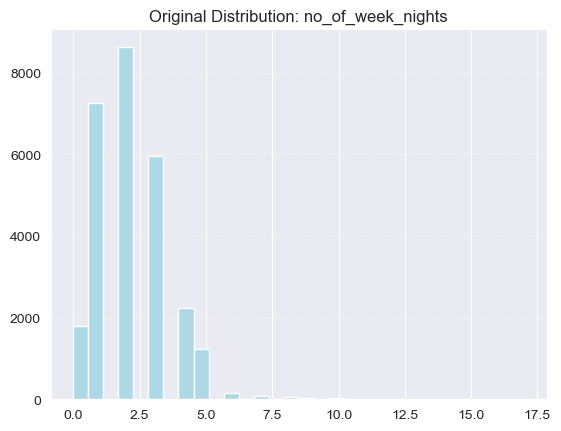

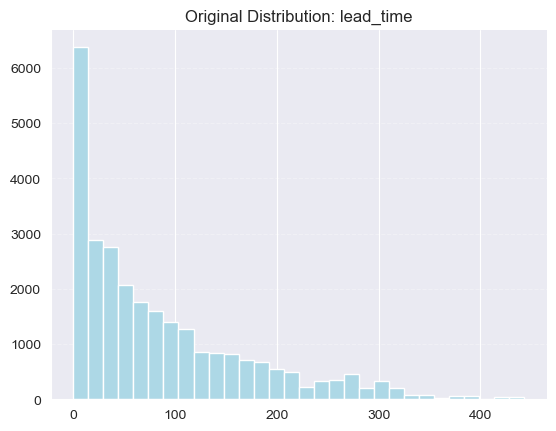

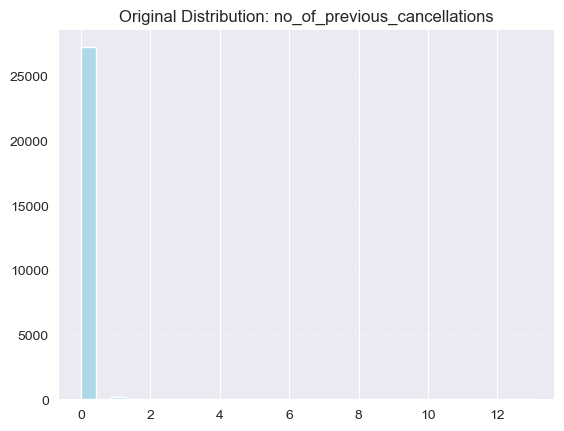

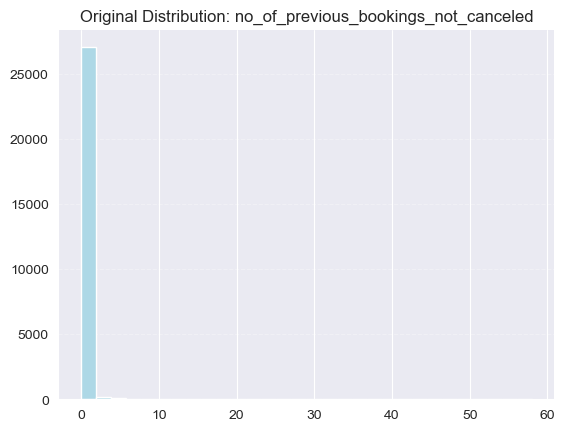

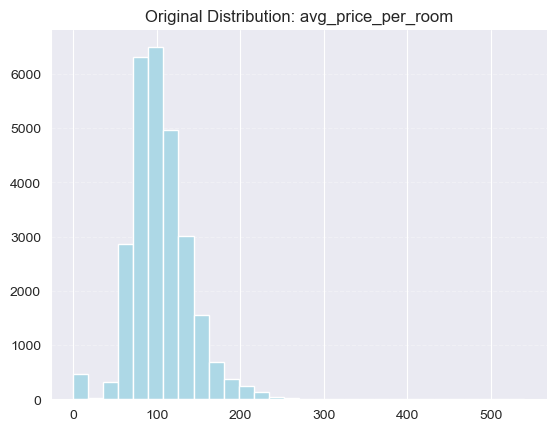

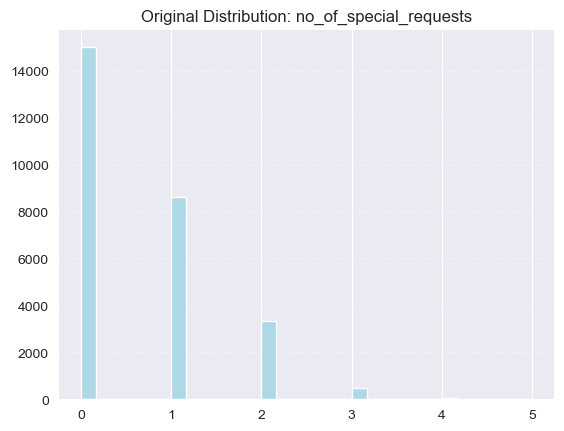

In [11]:
cols = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
    'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
    'no_of_special_requests'
]

for col in cols:
    fig, ax = plt.subplots()

    ax.hist(hotel_dataset[col].dropna(), bins=30, color='lightblue')
    ax.set_title(f'Original Distribution: {col}')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()


### Data Normalization and Standardization

In [12]:
# Columns to apply square root transformation
sqrt_columns = [
    'no_of_adults', 
    'no_of_children', 
    'no_of_weekend_nights', 
    'no_of_week_nights', 
    'lead_time', 
    'no_of_previous_cancellations', 
    'no_of_previous_bookings_not_canceled', 
    'avg_price_per_room', 
    'no_of_special_requests'
]

# Apply square root transformation
bookings_dataset_sqrt_transformed = hotel_dataset[sqrt_columns].apply(np.sqrt)

# Standard scaling (z-score normalization)
scaler = StandardScaler()
norm_data_array = scaler.fit_transform(bookings_dataset_sqrt_transformed)

# Convert back to DataFrame
norm_data = pd.DataFrame(norm_data_array, columns=sqrt_columns)

# Check the result
norm_data.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.341608,-0.277177,1.222019,0.651340,-1.200980,-0.089137,-0.12861,0.175691,0.811877
1,-1.608519,-0.277177,1.222019,-0.726021,-1.461842,-0.089137,-0.12861,-1.123987,-0.882405
2,0.341608,-0.277177,-1.036807,0.053326,1.392674,-0.089137,-0.12861,0.010326,-0.882405
3,0.341608,-0.277177,0.560424,-0.726021,-0.210744,-0.089137,-0.12861,-0.130021,-0.882405
4,0.341608,-0.277177,-1.036807,0.053326,2.252719,-0.089137,-0.12861,0.374572,0.811877


### Data Distribution After Preprocessing

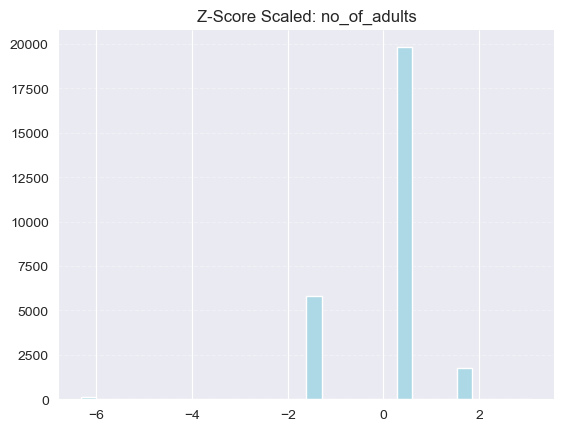

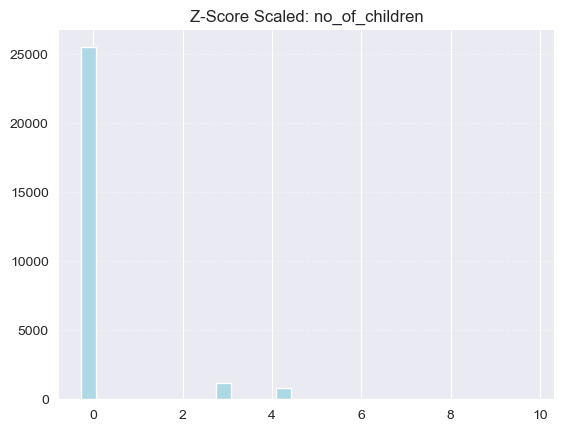

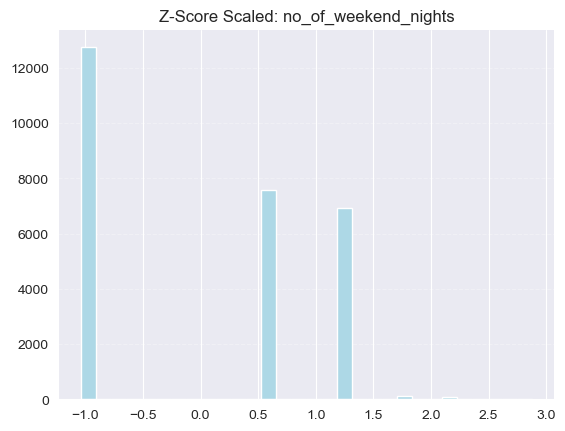

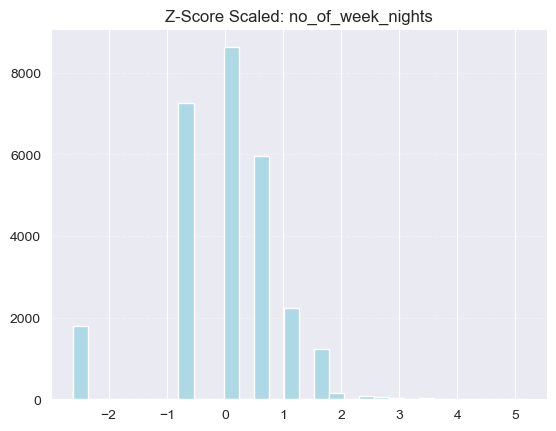

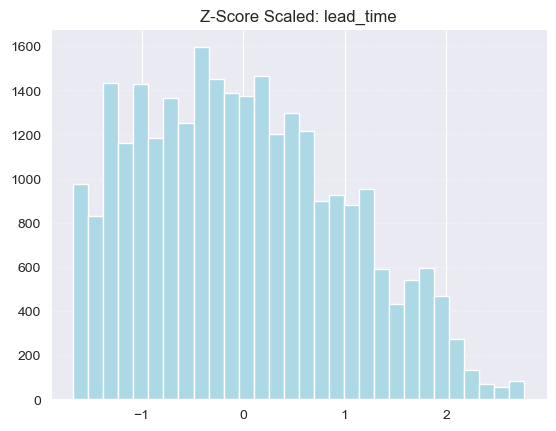

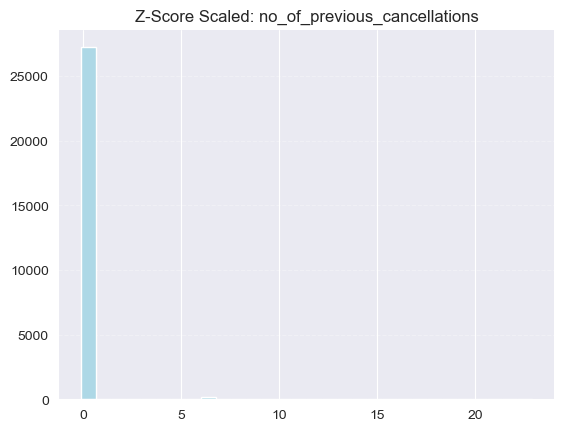

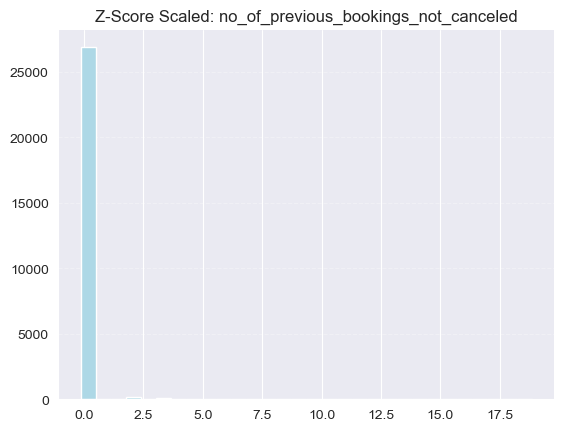

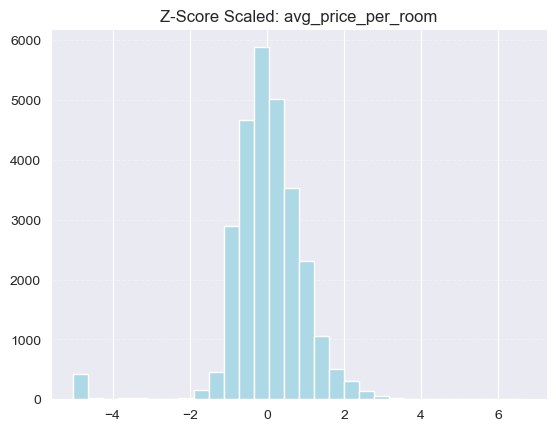

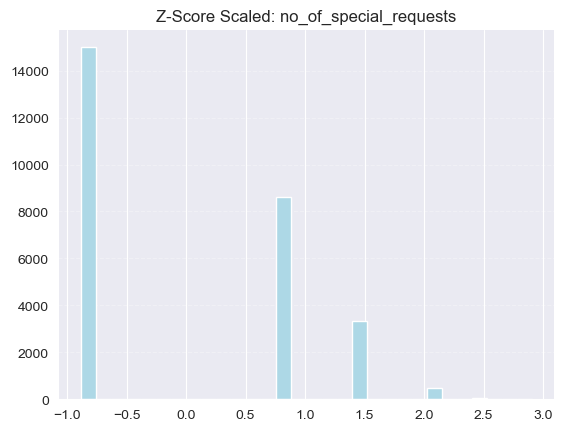

In [13]:
for col in cols:
    fig, ax = plt.subplots()

    ax.hist(norm_data[col].dropna(), bins=30, color='lightblue')
    ax.set_title(f'Z-Score Scaled: {col}')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()


## One-Hot Encoding for Categorical Variables


In [14]:
# 1. Select categorical columns
categorical_cols = hotel_dataset.select_dtypes(include='category').columns

# 2. Drop columns not to be encoded
categorical_cols = [col for col in categorical_cols if col not in ['arrival_date', 'arrival_month', 'booking_status']]

# 3. Extract categorical features
factor_dataset = hotel_dataset[categorical_cols]

# 4. One-hot encode the categorical features
one_hot_encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = one_hot_encoder.fit_transform(factor_dataset)

# 5. Convert to DataFrame
encoded_data = pd.DataFrame(
    encoded_array,
    columns=one_hot_encoder.get_feature_names_out(categorical_cols),
    index=factor_dataset.index  # Preserve row order
)

# 6. Combine normalized numeric features and one-hot encoded features
full_feature_set = pd.concat([
    norm_data.reset_index(drop=True),
    encoded_data.reset_index(drop=True)
], axis=1)

# 7. Standardize
scaler = StandardScaler()
predictors_scaled_array = scaler.fit_transform(full_feature_set)

# 8. Create final predictors DataFrame
predictors_scaled = pd.DataFrame(
    predictors_scaled_array,
    columns=full_feature_set.columns,
    index=full_feature_set.index
)

# 9. Add booking_status and optional row_id for alignment
predictors_scaled['booking_status'] = hotel_dataset['booking_status'].values
predictors_scaled['row_id'] = hotel_dataset.index

# 10. Save final dataset for modeling
predictors_scaled.to_csv('../data/bookings_dataset_normalized.csv', index=False)

# Preview
predictors_scaled.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,...,arrival_year_2018.0,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_0.0,repeated_guest_1.0,booking_status,row_id
0,0.341608,-0.277177,1.222019,0.651340,-1.200980,-0.089137,-0.12861,0.175691,0.811877,-1.825497,...,0.466675,-0.060702,-0.104823,-0.242671,-0.639316,0.750476,0.163935,-0.163935,Not_Canceled,1
1,-1.608519,-0.277177,1.222019,-0.726021,-1.461842,-0.089137,-0.12861,-1.123987,-0.882405,0.547796,...,0.466675,-0.060702,-0.104823,-0.242671,-0.639316,0.750476,0.163935,-0.163935,Canceled,2
2,0.341608,-0.277177,-1.036807,0.053326,1.392674,-0.089137,-0.12861,0.010326,-0.882405,0.547796,...,0.466675,-0.060702,-0.104823,-0.242671,-0.639316,0.750476,0.163935,-0.163935,Canceled,3
3,0.341608,-0.277177,0.560424,-0.726021,-0.210744,-0.089137,-0.12861,-0.130021,-0.882405,-1.825497,...,0.466675,-0.060702,-0.104823,-0.242671,-0.639316,0.750476,0.163935,-0.163935,Canceled,4
4,0.341608,-0.277177,-1.036807,0.053326,2.252719,-0.089137,-0.12861,0.374572,0.811877,-1.825497,...,0.466675,-0.060702,-0.104823,-0.242671,-0.639316,0.750476,0.163935,-0.163935,Canceled,5


Categorical variables have been encoded as dummy variables and subsequently combined with the numeric
data to create a unified dataset. This merged dataset will be used for further clustering and classification
analysis, facilitating comprehensive modeling that incorporates both numerical and categorical features.